## PIL 이용하기

In [ ]:
import os
from os.path import join
import numpy as np
from PIL import Image
import glob

In [ ]:
base_dir = "/content/drive/MyDrive/project_share"
folder  = "imageData"
cats = ["education_image", "game_image", "kpop_image", "mukbang_image"]
f_type = "*.jpg"

for c in cats:
  vars()["path_" + c] = join(base_dir, folder, c, f_type)

root_path = join(base_dir, folder)

In [ ]:
for folder in cats:
  path = "path_"+folder
  vars()[folder+'files'] = glob.glob(vars()[path])

In [ ]:
len(education_imagefiles)

18871

In [ ]:
img = Image.open(education_imagefiles[15000])
img_ar = np.asarray(img)

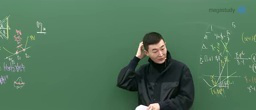

In [ ]:
img

In [ ]:
np.std(img_ar)

32.52399088542407

In [ ]:
img_ar.shape

(110, 256, 3)

In [ ]:
이미지 가져오는 것과 전처리코드를 분리

In [ ]:
def img_preprocessing(imagefile):
  # 이미지 불러오기
  img = Image.open(imagefile)
  # 동일한 사이즈로
  img = img.resize((256,144))
  # 이미지 array 변환
  img_ar = np.asarray(img)
  # 0~255 사이의 데이터를 0~1까지로 변환
  img_ar = img_ar/255
  # class 저장 => 모델이 어떻게 받는게 중요한지!!

  
  return img_ar

##io.BytesIO

In [ ]:
import os
from os.path import join
import numpy as np
from PIL import Image
import io
import glob

In [ ]:
base_dir = "/content/drive/MyDrive/project_share"
folder  = "imageData"
cats = ["education_image", "game_image", "kpop_image", "mukbang_image"]
f_type = "*.jpg"

for c in cats:
  vars()["path_" + c] = join(base_dir, folder, c, f_type)

root_path = join(base_dir, folder)

In [ ]:
for folder in cats:
  path = "path_"+folder
  vars()[folder+'files'] = glob.glob(vars()[path])

In [ ]:
def img_preprocessing(imagefile):
  # 이미지 불러오기
  with open(imagefile, 'rb') as f:
    data = f.read()
  data_io = io.BytesIO(data)  # 파일을 읽어올때 바이트 형태로..!
  img = Image.open(data_io)
  # 동일한 사이즈로
  img = img.resize((256,144))
  # 이미지 array 변환
  img_ar = np.asarray(img)
  # 0~255 사이의 데이터를 0~1까지로 변환
  img_ar = img_ar/255
  
  return img_ar

## OpenCV

In [ ]:
import cv2
import os
from os.path import join
import numpy as np
from matplotlib import pyplot as plt
import glob

In [ ]:
base_dir = "/content/drive/MyDrive/project_share"
folder  = "imageData"
cats = ["education_image", "game_image", "kpop_image", "mukbang_image"]
f_type = "*.jpg"

for c in cats:
  vars()["path_" + c] = join(base_dir, folder, c, f_type)

root_path = join(base_dir, folder)

In [ ]:
for folder in cats:
  path = "path_"+folder
  vars()[folder+'files'] = glob.glob(vars()[path])

(<matplotlib.image.AxesImage at 0x7f9437642c90>, (-0.5, 255.5, 109.5, -0.5))

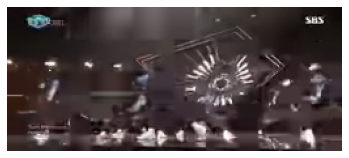

In [ ]:
test = kpop_imagefiles[200]
with open(test, 'rb') as f:
  data = f.read()
encoded_img = np.frombuffer(data, dtype = np.uint8)
#encoded_img
img_ar = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
#img_ar
re = cv2.resize(img_ar, (256,110))
plt.imshow(re), plt.axis('off')

이런 방식이 더 좋다~!

파이토치에는 float형식의 데이터를 입력해야함~!
아래의 unit8데이터 형식을 사용하지 못함!

1. image load

In [ ]:
dirs = os.listdir('/content/drive/MyDrive/project_share/imageData')
dirs.sort()
dataset = []

for class_id, d in enumerate(dirs):
  sets = (class_id, d)
  dataset.append(sets)

In [ ]:
for i, d in dataset:
  print(i)
  print(d)

0
education_image
1
game_image
2
kpop_image
3
mukbang_image


In [ ]:
def img_load(jpg):
  # class 
  voca = jpg.split("/")
  for i, d in dataset:
    if d in voca:
      img_class = i
  # binary 형태로 이미지 읽은 후 decode 
  with open(jpg, 'rb') as f:  # binary mode로 읽었기 때문에 byte 단위로 데이터 저장
    data = f.read()

  return {"image" : data, "class":img_class}

In [ ]:
test = kpop_imagefiles[200]
img_load(test)

{'class': 2,
 'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\x90\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x

In [ ]:
test = kpop_imagefiles[200]
decoded = img_decoding(test)
decoded = cv2.resize(decoded, (224,224))
#print(decoded)
#print(decoded.T)
#print(np.transpose(decoded))
decoded = np.transpose(decoded)
decoded = decoded/255
decoded = (decoded-0.5)/1
decoded = decoded.astype(np.float64)
print(decoded)

[[[-0.42941176 -0.4254902  -0.42156863 ... -0.3        -0.3
   -0.3       ]
  [-0.42941176 -0.4254902  -0.42156863 ... -0.3        -0.3
   -0.3       ]
  [-0.42156863 -0.42156863 -0.41764706 ... -0.3        -0.3
   -0.3       ]
  ...
  [-0.44117647 -0.44117647 -0.44117647 ... -0.21764706 -0.21764706
   -0.21764706]
  [-0.44117647 -0.44117647 -0.44117647 ... -0.21764706 -0.21764706
   -0.21764706]
  [-0.44117647 -0.44117647 -0.44117647 ... -0.21764706 -0.21764706
   -0.21764706]]

 [[-0.44901961 -0.45294118 -0.45294118 ... -0.35882353 -0.35882353
   -0.35882353]
  [-0.44901961 -0.45294118 -0.45294118 ... -0.35882353 -0.35882353
   -0.35882353]
  [-0.45294118 -0.45294118 -0.45686275 ... -0.35882353 -0.35882353
   -0.35882353]
  ...
  [-0.46078431 -0.46078431 -0.46078431 ... -0.3        -0.3
   -0.3       ]
  [-0.46078431 -0.46078431 -0.46078431 ... -0.3        -0.3
   -0.3       ]
  [-0.46078431 -0.46078431 -0.46078431 ... -0.3        -0.3
   -0.3       ]]

 [[-0.45294118 -0.45294118 -0.

2. image preprocessing

In [1]:
def img_preprocessing(jpg):
  # decode
  encoded_img = np.frombuffer(data, dtype = np.uint8)  # buffer means byte
  img_ar = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)  # 1D-array encoded_img를 3D-array로 
  # 동일한 사이즈로
  img_ar = cv2.resize(img_ar, (224,224))
  # 0~255 사이의 데이터를 0~1까지로 변환
  img_ar = img_ar/255
  # zero-centered
  img_ar = (img_ar-0.5)/1   # 표준편차 계산해보기
  # pytoroch tensor에 형태 맞춰주기
  img_ar = np.transpose(img_ar)
  # to float
  img_ar = img_ar.astype(np.float64)
  # 배치형태로 가져올 수 있도록 차원 확장하기
  # 파이토치 데이터 차원 구성 : ( batch size, channel 개수, 이미지 크기)
  img_ar = np.expand_dims(img_ar, axis = 0)   ## array size (1, 3, 224, 224)

  
  return img_ar


  ## 편향성을 가지고 있지만 augmentation이 필요한 데이터의 수는 아니기 때문에 나중에 해보자..!

  # 모델에서 ToTensor를 이용하여 텐서로 변환 후 학습에 바로 할 수 있도록 만들어주는 것이 포인트!!

#### 이미지를 binary 형태로 변환하는 방법

이건 나중에 User가 동영상을 입력해줄 때 binary로 encoding 하는 부분이 필요하기 때문에 넣어둔것!

지금은 필요없다~!

In [ ]:
## PIL
img_pil = Image.open(img_path)
output = io.BytesIO()
img_pil.save(output, 'jpg')
# binary_pil = output.getvalue()

## cv2 
img_cv = cv2.imread(img_path)
binary_cv = cv2.imencode('.jpg', img_cv)[1].tobytes()